<a href="https://colab.research.google.com/github/SMushkin/Employee-promotion-prediction/blob/main/Employee_promotion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lets import the Library

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_validate,validation_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [5]:
# lets read the dataset
df= pd.read_csv('train_data.csv')

In [6]:
# lets check the head of the dataset
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won',
       'avg_training_score', 'is_promoted']
df.columns = cols

In [8]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
df.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [11]:
service_filter = df[df.length_of_service == 1]
print(
    "Null rating counts of employees with length of service 1\n",
    service_filter.previous_year_rating.isnull().sum()
)
print(
    "Null rating counts of employees with length of service 1 and promoted\n",
    service_filter[service_filter.is_promoted == 1].previous_year_rating.isnull().sum()
)
df.previous_year_rating = df.previous_year_rating.fillna(0)

Null rating counts of employees with length of service 1
 4124
Null rating counts of employees with length of service 1 and promoted
 339


In [12]:
df[df.education.isna()].is_promoted.value_counts()

0    2287
1     122
Name: is_promoted, dtype: int64

In [13]:
depts = df.department.unique()

for dept in depts:
    edu = df[df.department == dept].education.mode()[0]
    print(dept," : ",edu)

Sales & Marketing  :  Bachelor's
Operations  :  Bachelor's
Technology  :  Bachelor's
Analytics  :  Bachelor's
R&D  :  Bachelor's
Procurement  :  Bachelor's
Finance  :  Bachelor's
HR  :  Bachelor's
Legal  :  Bachelor's


In [14]:
df.education = df.education.fillna(df.education.mode()[0])

In [15]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met                    2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


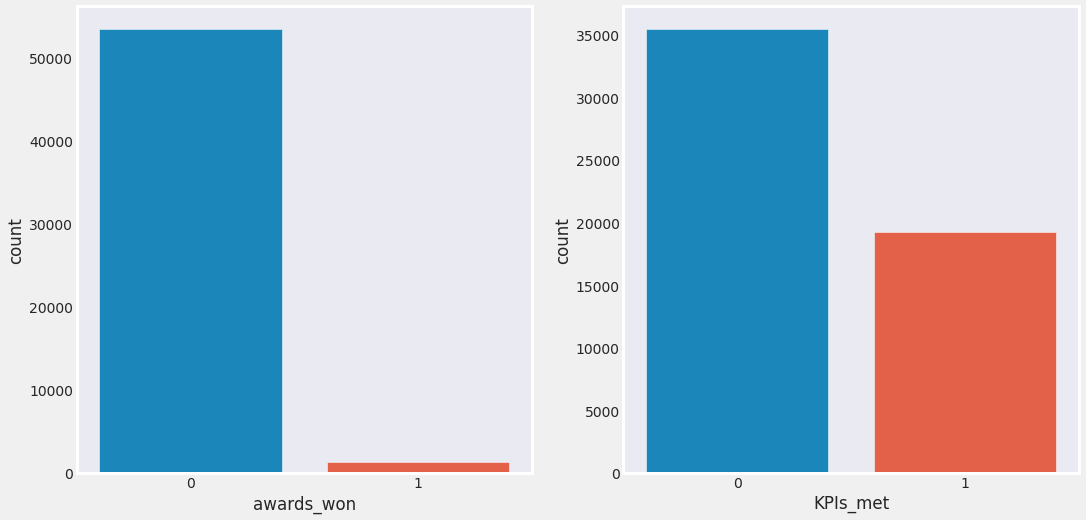

In [16]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(16,8))
sns.set_style('dark')
plt.subplot(1,2,1)
sns.countplot(df['awards_won'])
plt.subplot(1,2,2)
sns.countplot(df['KPIs_met'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


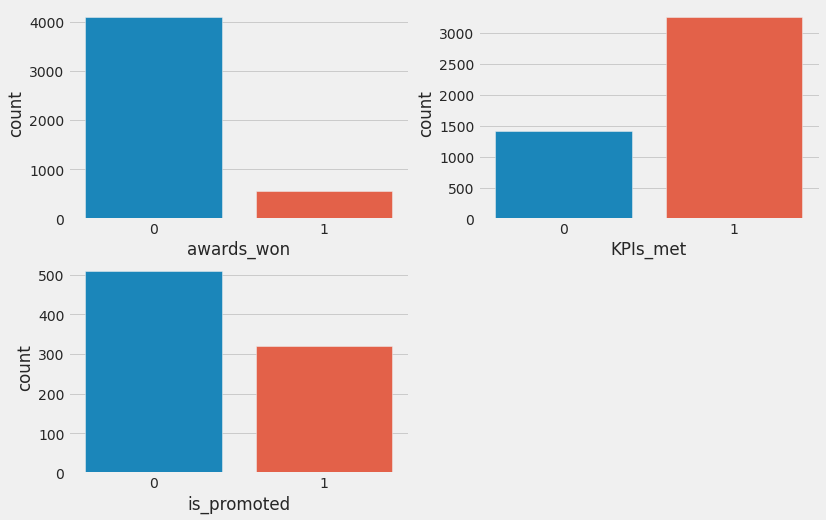

In [17]:
star_emps = df[(df.KPIs_met == 1) & (df.awards_won == 1)]

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(df[df.is_promoted == 1].awards_won)
plt.subplot(2,2,2)
sns.countplot(df[df.is_promoted == 1].KPIs_met)
plt.subplot(2,2,3)
sns.countplot(star_emps.is_promoted)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'number of employees')

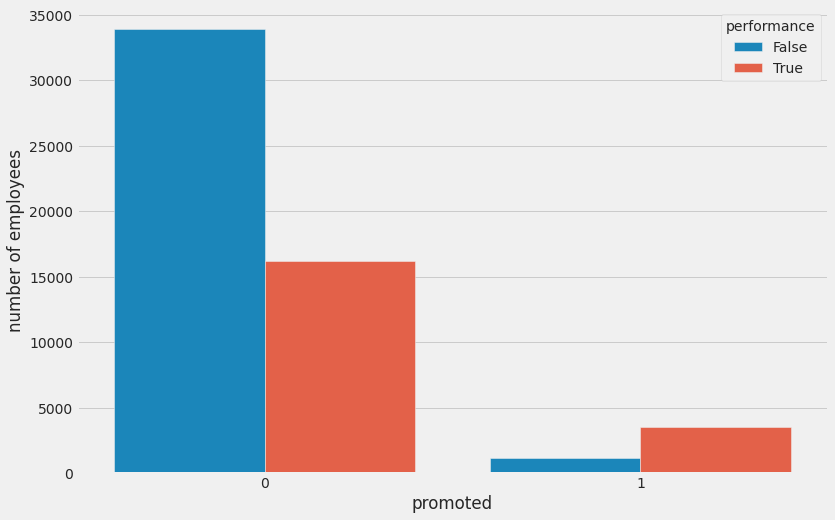

In [18]:
df['performance'] = df[['KPIs_met','awards_won']].any(axis=1,skipna=False)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.countplot(df.is_promoted,hue=df.performance)
plt.xlabel('promoted')
plt.ylabel('number of employees')

In [19]:
df.gender.value_counts(normalize=True)

m    0.702379
f    0.297621
Name: gender, dtype: float64

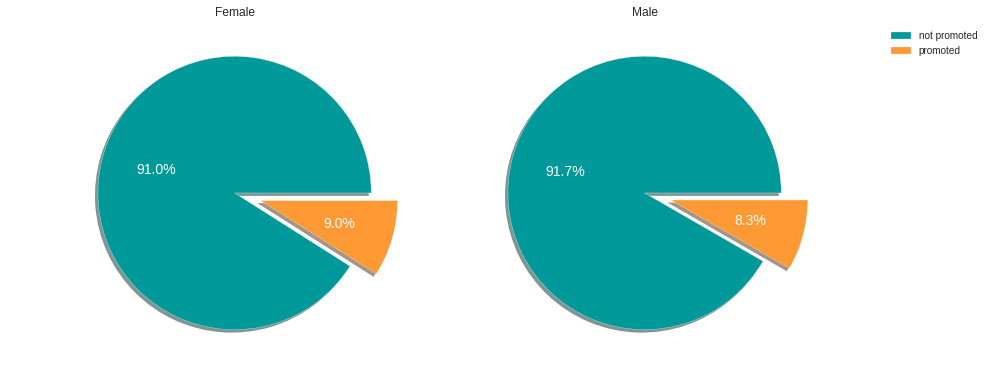

In [21]:
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=df[df.gender=='f'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=df[df.gender=='m'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Male")
plt.legend(['not promoted','promoted'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

In [22]:
df['total_score'] = df.no_of_trainings * df.avg_training_score
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73


In [23]:
df['total_score_label'] = pd.cut(df.total_score,bins=[0,65,145,1000],labels=['Low','Mediocre','High'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre


In [24]:
scores = df.pivot_table(values='is_promoted',index='total_score_label')
scores

,is_promoted
total_score_label,
Low,0.057549
Mediocre,0.117858
High,0.097444


Text(0.5, 0, 'score level')

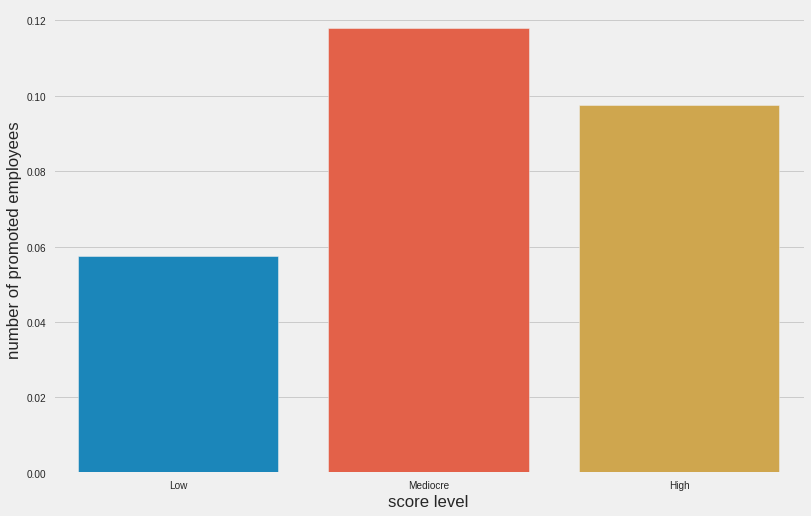

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=scores.index,
    y=scores.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('score level')

In [26]:
df['service_catg'] = pd.cut(
    df.length_of_service,
    bins=[0,2,7,10,37],
    labels=['New','Established','Experienced','Veteran']
)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New


In [27]:
service = df.pivot_table(values='is_promoted',index='service_catg')
service

,is_promoted
service_catg,
New,0.086546
Established,0.084940
Experienced,0.091110
Veteran,0.075943


Text(0.5, 0, 'service category')

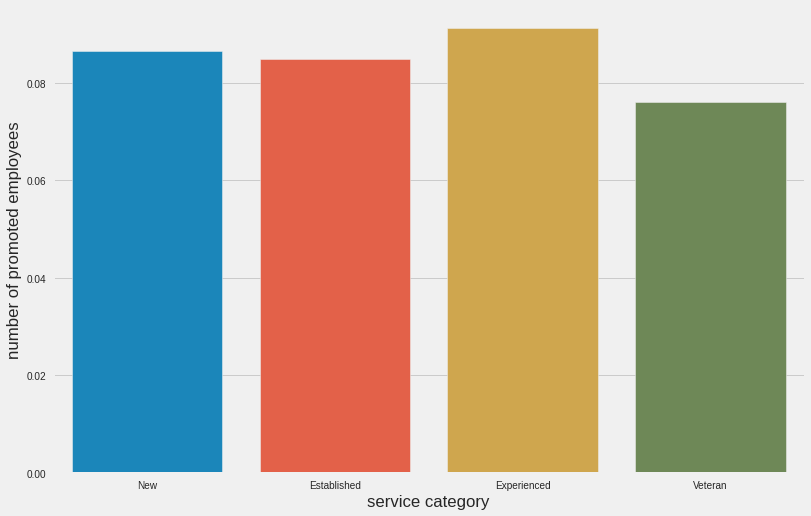

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=service.index,
    y=service.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('service category')

In [29]:
df['age_label'] = pd.cut(df.age,bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced,Middle
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established,Middle
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established,Middle
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced,Middle
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New,Senior


In [30]:
ages = df.pivot_table(values='is_promoted',index='age_label')
ages

,is_promoted
age_label,
Young,0.066357
Middle,0.090173
Senior,0.072727
Elder,0.066971


Text(0.5, 0, 'age category')

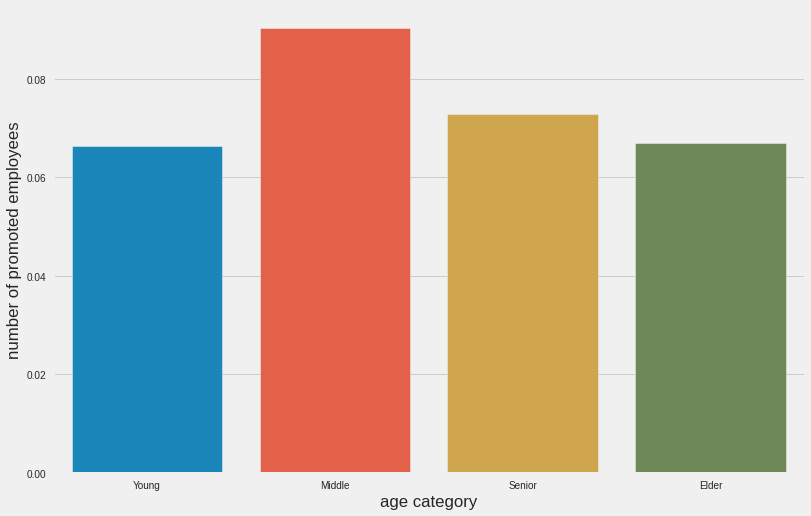

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ages.index,
    y=ages.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('age category')

In [32]:
new_emps = df[df.service_catg == 'New']

new_age = new_emps.pivot_table(values='is_promoted',index='age_label')
new_age

,is_promoted
age_label,
Young,0.066873
Middle,0.093564
Senior,0.084112
Elder,0.000000


Text(0.5, 0, 'age category')

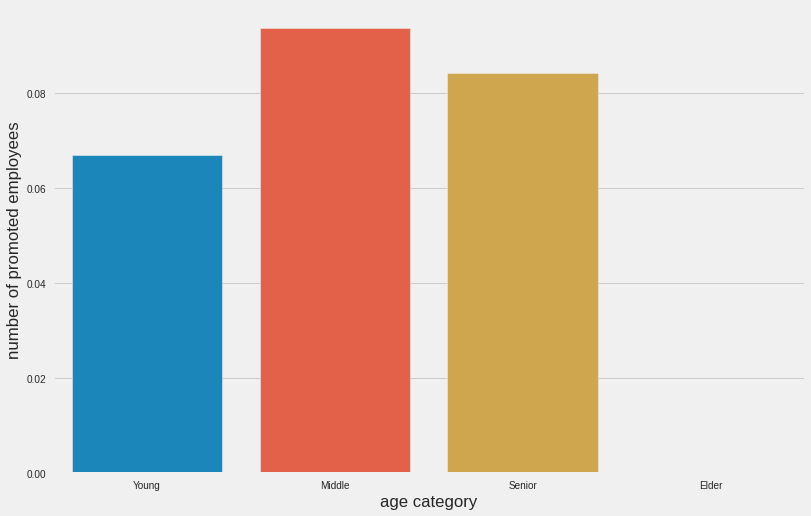

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=new_age.index,
    y=new_age.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('age category')

In [34]:
def decode(val):
    if val == 0:
        return 'New'
    elif val == 1:
        return 'Minimum'
    elif val == 2:
        return 'Fair'
    elif val == 3:
        return 'Improving'
    elif val == 4:
        return 'Good'
    else:
        return 'Very good'
    
df['rating_label'] = df.previous_year_rating.apply(decode)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label,rating_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced,Middle,Very good
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established,Middle,Very good
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established,Middle,Improving
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced,Middle,Minimum
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New,Senior,Improving


In [35]:
ratings = df.pivot_table(values='is_promoted',index='rating_label')
ratings

,is_promoted
rating_label,
Fair,0.042840
Good,0.079376
Improving,0.072779
Minimum,0.014141
New,0.082202
Very good,0.163615


Text(0.5, 0, 'ratings')

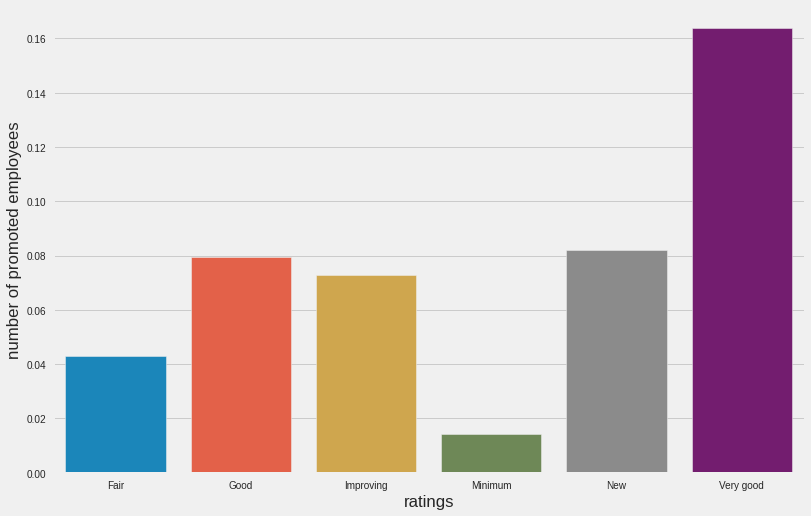

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ratings.index,
    y=ratings.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('ratings')

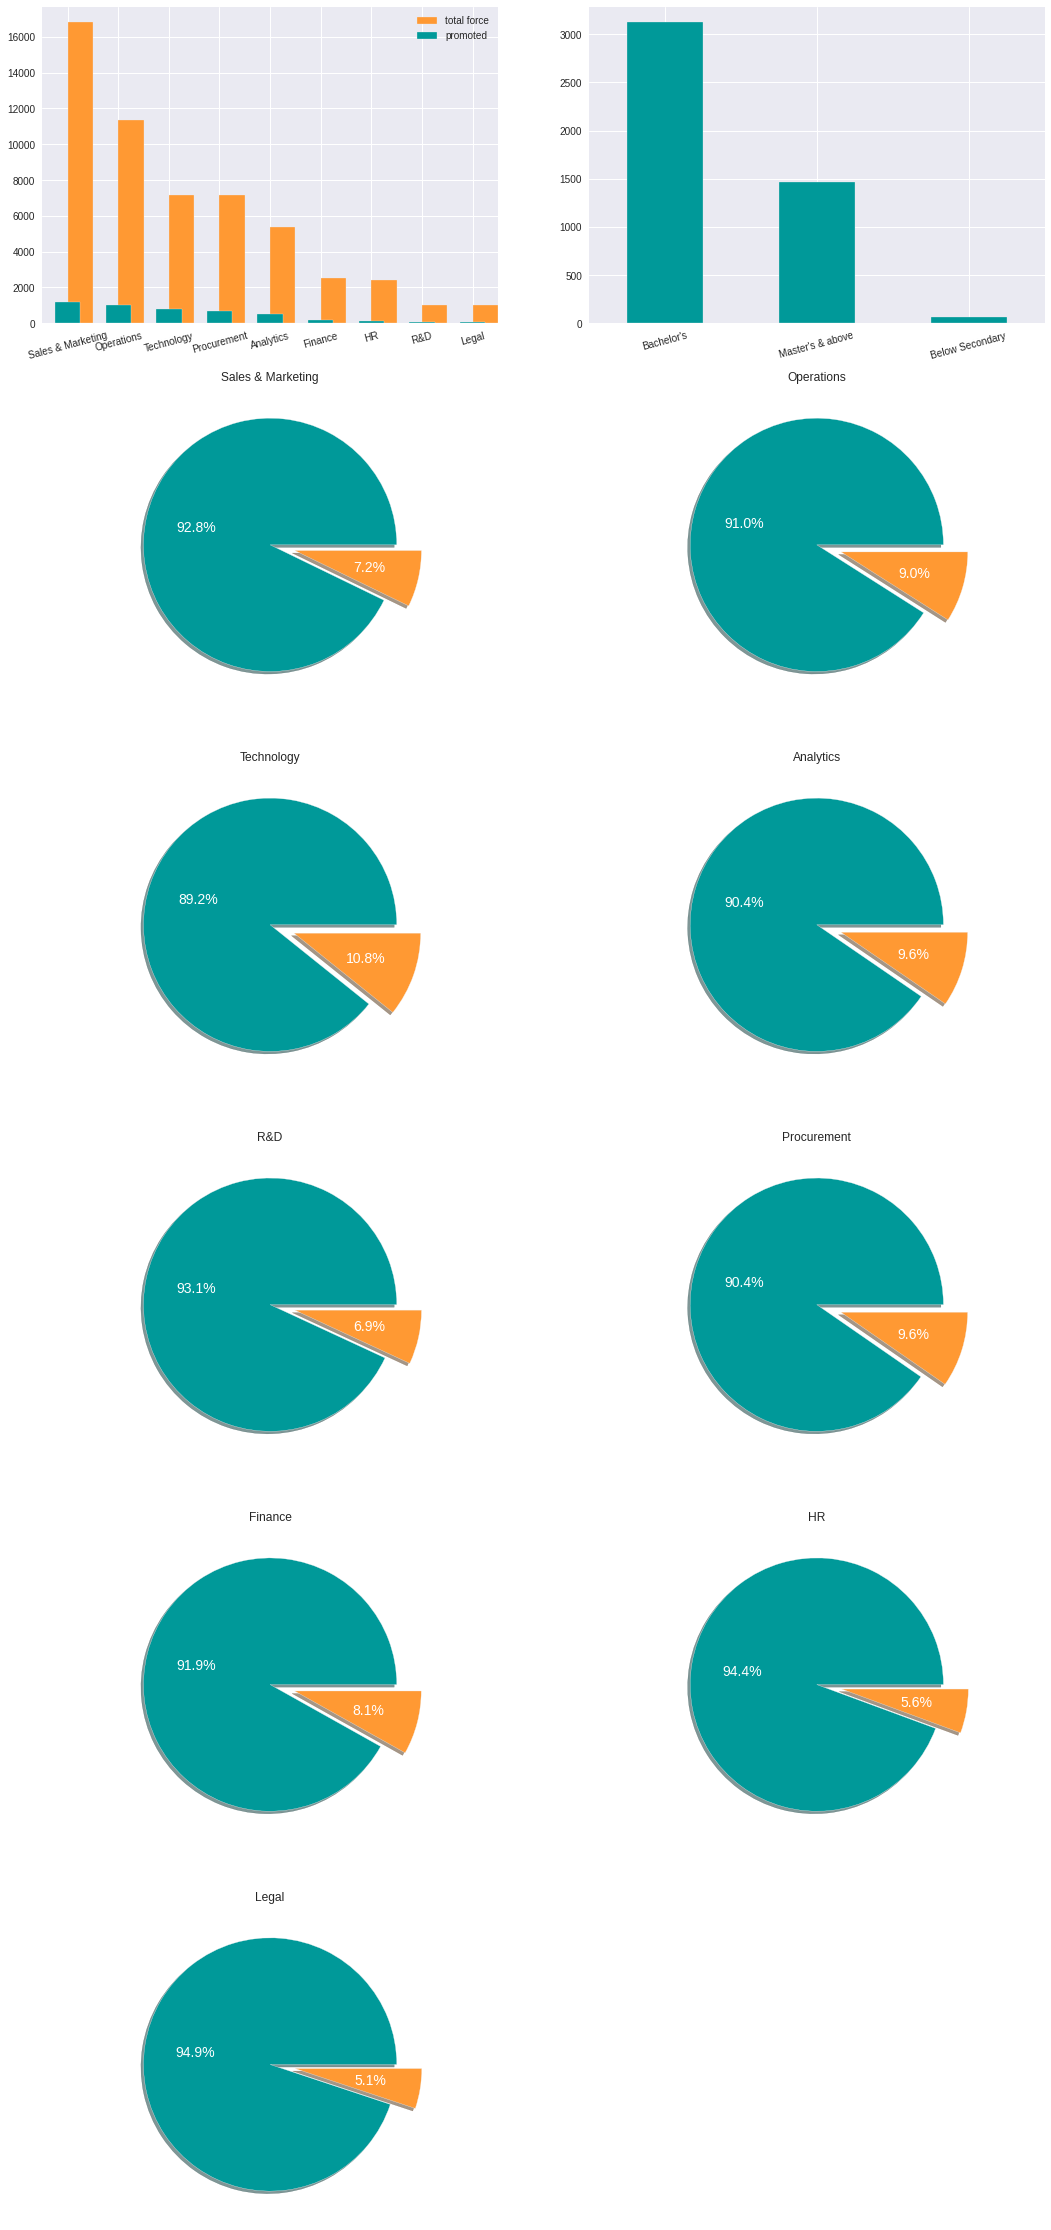

In [37]:
plt.style.use('seaborn')
fig,ax = plt.subplots(2,2,figsize=(16,38))
plt.subplot(6,2,1)
df.department.value_counts().plot.bar(color='#ff9933',align='edge')
df[df.is_promoted == 1].department.value_counts().plot.bar(color='#009999',rot=15,align='center')
plt.legend(['total force','promoted'])
plt.subplot(6,2,2)
df[df.is_promoted == 1].education.value_counts().plot.bar(rot=15,color='#009999')

for ind,dept in enumerate(df.department.unique()):
    plt.subplot(6,2,ind+3)
    plt.title(dept)
    plt.pie(
        x=df[df.department==dept].is_promoted.value_counts(normalize=True),
        labels=['not promoted','promoted'],
        explode=[0,0.2],
        autopct="%1.1f%%",
        shadow=True,
        textprops=dict(color='w',fontsize=14),
        colors=['#009999','#ff9933']
    )

In [38]:
rm_cols = [
    'employee_id',
    'department',
    'region',
    'education',
    'gender',
    'recruitment_channel',
    'KPIs_met',
    'awards_won',
    'total_score_label',
    'service_catg',
    'age_label',
    'rating_label'
]

df.drop(rm_cols,axis=1,inplace=True)
df.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,performance,total_score
0,1,35,5.0,8,49,0,True,49
1,1,30,5.0,4,60,0,False,60
2,1,34,3.0,7,50,0,False,50
3,2,39,1.0,10,50,0,False,100
4,1,45,3.0,2,73,0,False,73


In [39]:
df.performance = df.performance.apply(lambda x: 1 if x else 0)

0    50140
1     4668
Name: is_promoted, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


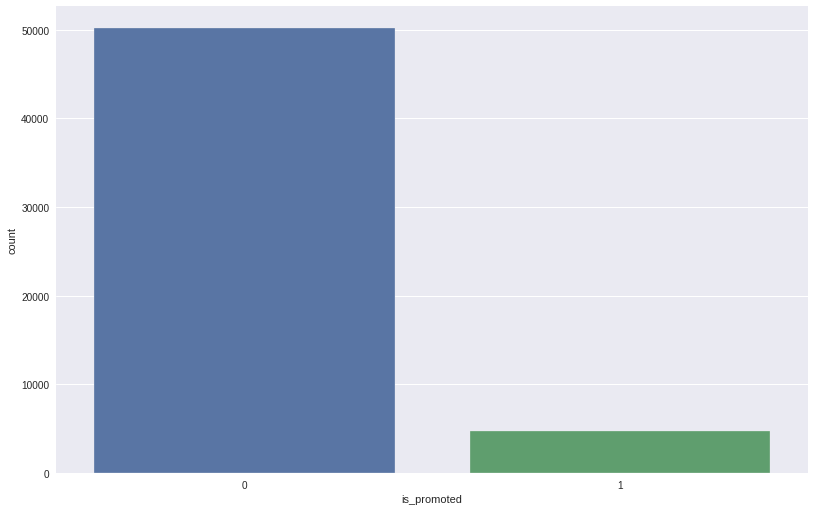

In [40]:
print(df.is_promoted.value_counts())

plt.figure(figsize=(12,8))
sns.countplot(df.is_promoted)

In [41]:
X = df.drop('is_promoted',axis=1)
y = df.is_promoted

cols = X.columns

resampler = RandomOverSampler(random_state=1)
X_res,y_res = resampler.fit_resample(X,y)
print(X_res.shape)
print(y_res.value_counts())

(100280, 7)
1    50140
0    50140
Name: is_promoted, dtype: int64


In [42]:
scaler = MinMaxScaler()
X_res = pd.DataFrame(scaler.fit_transform(X_res))
X_res.head(5)

,0,1,2,3,4,5,6
0,0.000000,0.375,1.0,0.194444,0.166667,1.0,0.014903
1,0.000000,0.250,1.0,0.083333,0.350000,0.0,0.031297
2,0.000000,0.350,0.6,0.166667,0.183333,0.0,0.016393
3,0.111111,0.475,0.2,0.250000,0.183333,0.0,0.090909
4,0.000000,0.625,0.6,0.027778,0.566667,0.0,0.050671


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=0)

In [46]:
scores = cross_validate(
    GradientBoostingClassifier(max_depth=10,random_state=0),
    X_res,
    y_res,
    cv=5,
    scoring=['accuracy','precision_macro','recall_macro','f1'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))
print('Avg Precision: ',np.mean(scores['test_precision_macro']))
print('Avg Recall: ',np.mean(scores['test_recall_macro']))
print('Avg F1 score: ',np.mean(scores['test_f1']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  20.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s remaining:    0.0s


[CV] END .................................................... total time=  20.3s
[CV] END .................................................... total time=  20.5s
[CV] END .................................................... total time=  20.5s
[CV] END .................................................... total time=  20.4s
Avg Test score:  0.873294774631033
Avg Precision:  0.8848476260377431
Avg Recall:  0.873294774631033
Avg F1 score:  0.8833983604998666


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [49]:
params = np.arange(10,26,1)
scores = validation_curve(
    GradientBoostingClassifier(),
    X_res,
    y_res,
    param_name='max_depth',
    param_range=params,
    scoring='accuracy',
    verbose=3,
    cv=3
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [47]:
train_scores = scores[0]
test_scores = scores[1]

train_means = np.mean(train_scores,axis=1)
test_means = np.mean(test_scores,axis=1)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.lineplot(x=params,y=train_means)
sns.lineplot(x=params,y=test_means)
plt.legend(['train score','validation score'])

KeyError: ignored

In [ ]:
model = GradientBoostingClassifier(max_depth=20,random_state=0)
grid_vals ={
    'learning_rate':np.arange(0.1,0.5,0.1),
    'n_estimators':np.arange(100,500,100)
}
grid_mod = GridSearchCV(model,param_grid=grid_vals,cv=3,verbose=1)
grid_mod.fit(X_train,y_train)
print(grid_mod.best_params_)
print(grid_mod.best_score_)

In [ ]:
#Applying Gradient Boosting Classifier
model = GradientBoostingClassifier(learning_rate=0.4,n_estimators=300,max_depth=20,random_state=0)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

In [ ]:
pred = model.predict(X_test)
print(classification_report(pred,y_test))